# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [50]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
df_house = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project Data Science/Case Study 02/train_house.csv")

In [52]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [54]:
#cek dulu nullnya
total = df_house.isnull().sum().sort_values(ascending=False)
percent = (df_house.isnull().sum()/df_house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [55]:
# Drop variabel NaN
df_house = df_house.dropna(axis=1)
df_house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [56]:
# Memisahkan data menjadi numerikal & kategorikal
#Numerik
num_cols = df_house._get_numeric_data().columns
house_numeric = df_house[num_cols]
house_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [57]:
#categorikal
house_categorical = df_house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [58]:
#savedata
house_numeric.to_csv('house_numeric.csv')
house_categorical.to_csv('house_categorical.csv')

# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

**1.Barplot Kategorikal**

<Axes: ylabel='Utilities'>

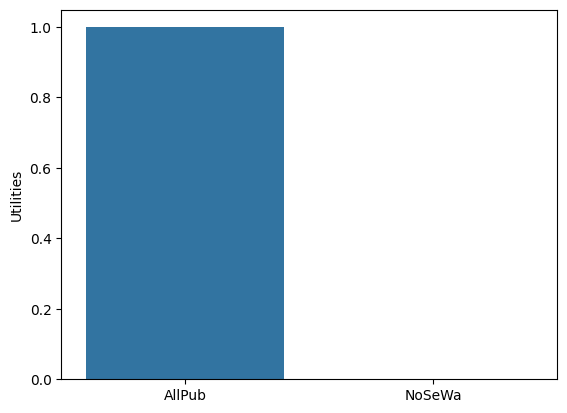

In [59]:
### Tulis kode Anda di sini
#Barplot
sns.barplot(x=house_categorical['Utilities'].value_counts().index,
                 y=house_categorical['Utilities'].value_counts(normalize = True))



*   99% (1459) data kategorikal Utilities berada di AllPub
*   NoSewa 0.01% data (1)



In [60]:
house_categorical['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: ylabel='HouseStyle'>

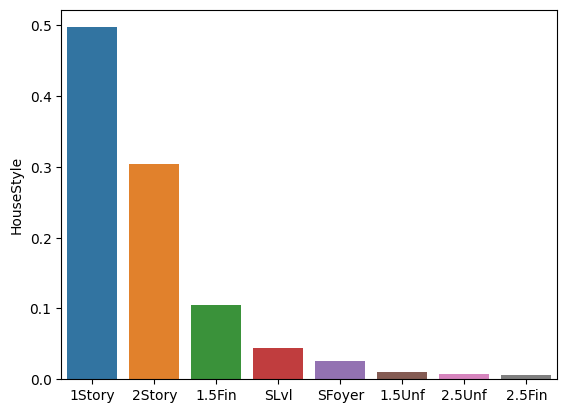

In [61]:
### Tulis kode Anda di sini
#Barplot
sns.barplot(x=house_categorical['HouseStyle'].value_counts().index,
                 y=house_categorical['HouseStyle'].value_counts(normalize = True))

House Style memiliki Imbalanced data dimana yang memiliki data terbesar ada di 1Story dan 2Story, disini dataset tidak ada penjelasan lebih lanjut tentang kategori 1Story itu Style apa sehingga menjadi ambigu

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

<Axes: ylabel='ExterQual'>

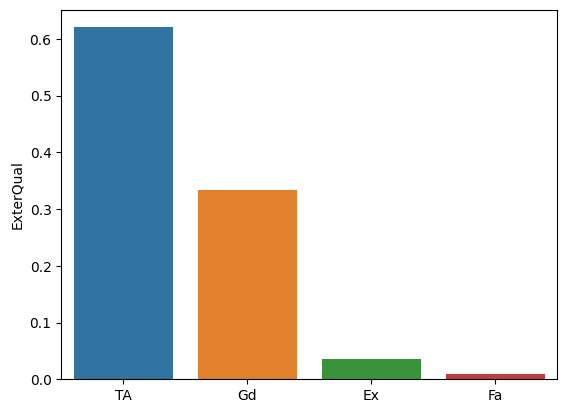

In [62]:
### Tulis kode Anda di sini
#Barplot
sns.barplot(x=house_categorical['ExterQual'].value_counts().index,
                 y=house_categorical['ExterQual'].value_counts(normalize = True))

#### **Analisis tentang variabel kategorikal**

Imbalance data dimana TA memiliki data lebih dari 60%
Dari data diatas kita belum bisa menyimpulkan apapun tapi dari data diatas kita bisa mendapatkan sebuah data dapat terdistribusi dari barplot

**2.Histogram Numerik**

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

<ipython-input-63-648c19bc7cfd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288662


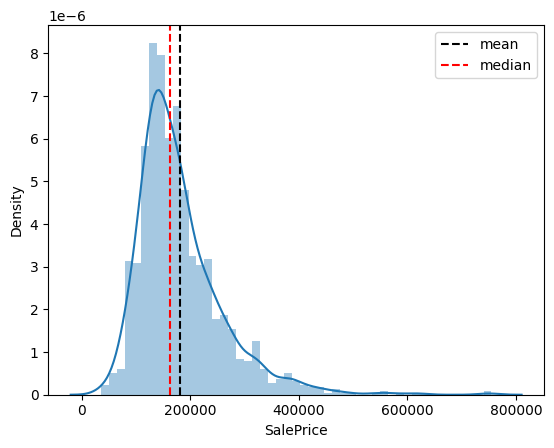

In [63]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
#Histplot
x = house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**


*   Dilihat dari data diatas maka Distribusi Right-Skewed
*   Range Harga 100.000 - 300.000
*   Nilai Positif

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

<ipython-input-64-4a63ba7208fd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232025


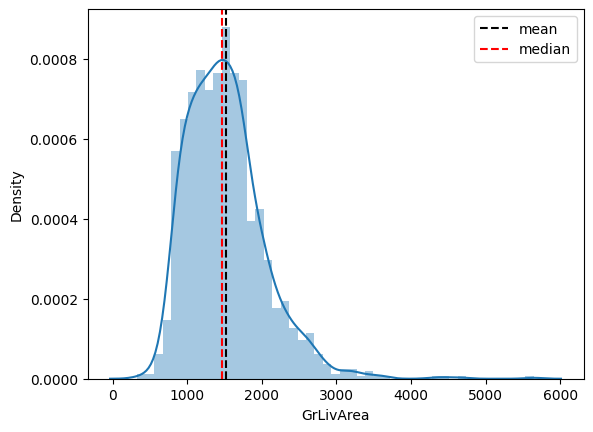

In [64]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
#Histplot
x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

*   Luasan rumah antara 1000- 2000 Square feet
*   Right Skewed

### PoolArea

* PoolArea berisi informasi mengenai Kolam Renang (jika ada)
* Ada atau tidaknya kolam

<ipython-input-65-de1109299c74>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 0.0
Mean: 2.758904109589041
Std Dev: 40.17730694453019


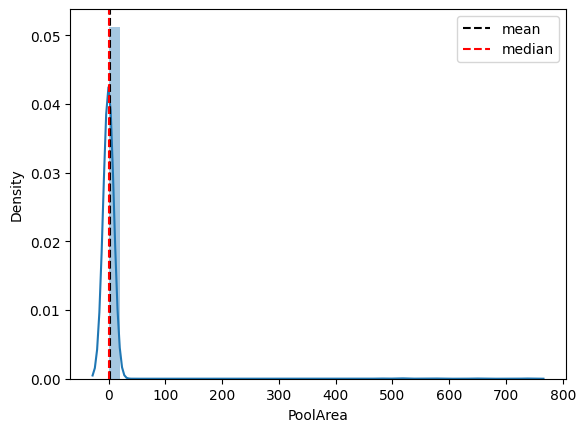

In [65]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
#Histplot
x = house_numeric["PoolArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()



*   Nilai semuanya hampir mendekati 0
*   Harus di cek nilainya



In [66]:
print('number of nonzero values:',np.sum(house_numeric['PoolArea'] != 0))
print('number of zero values:',np.sum(house_numeric['PoolArea'] == 0))

number of nonzero values: 7
number of zero values: 1453


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

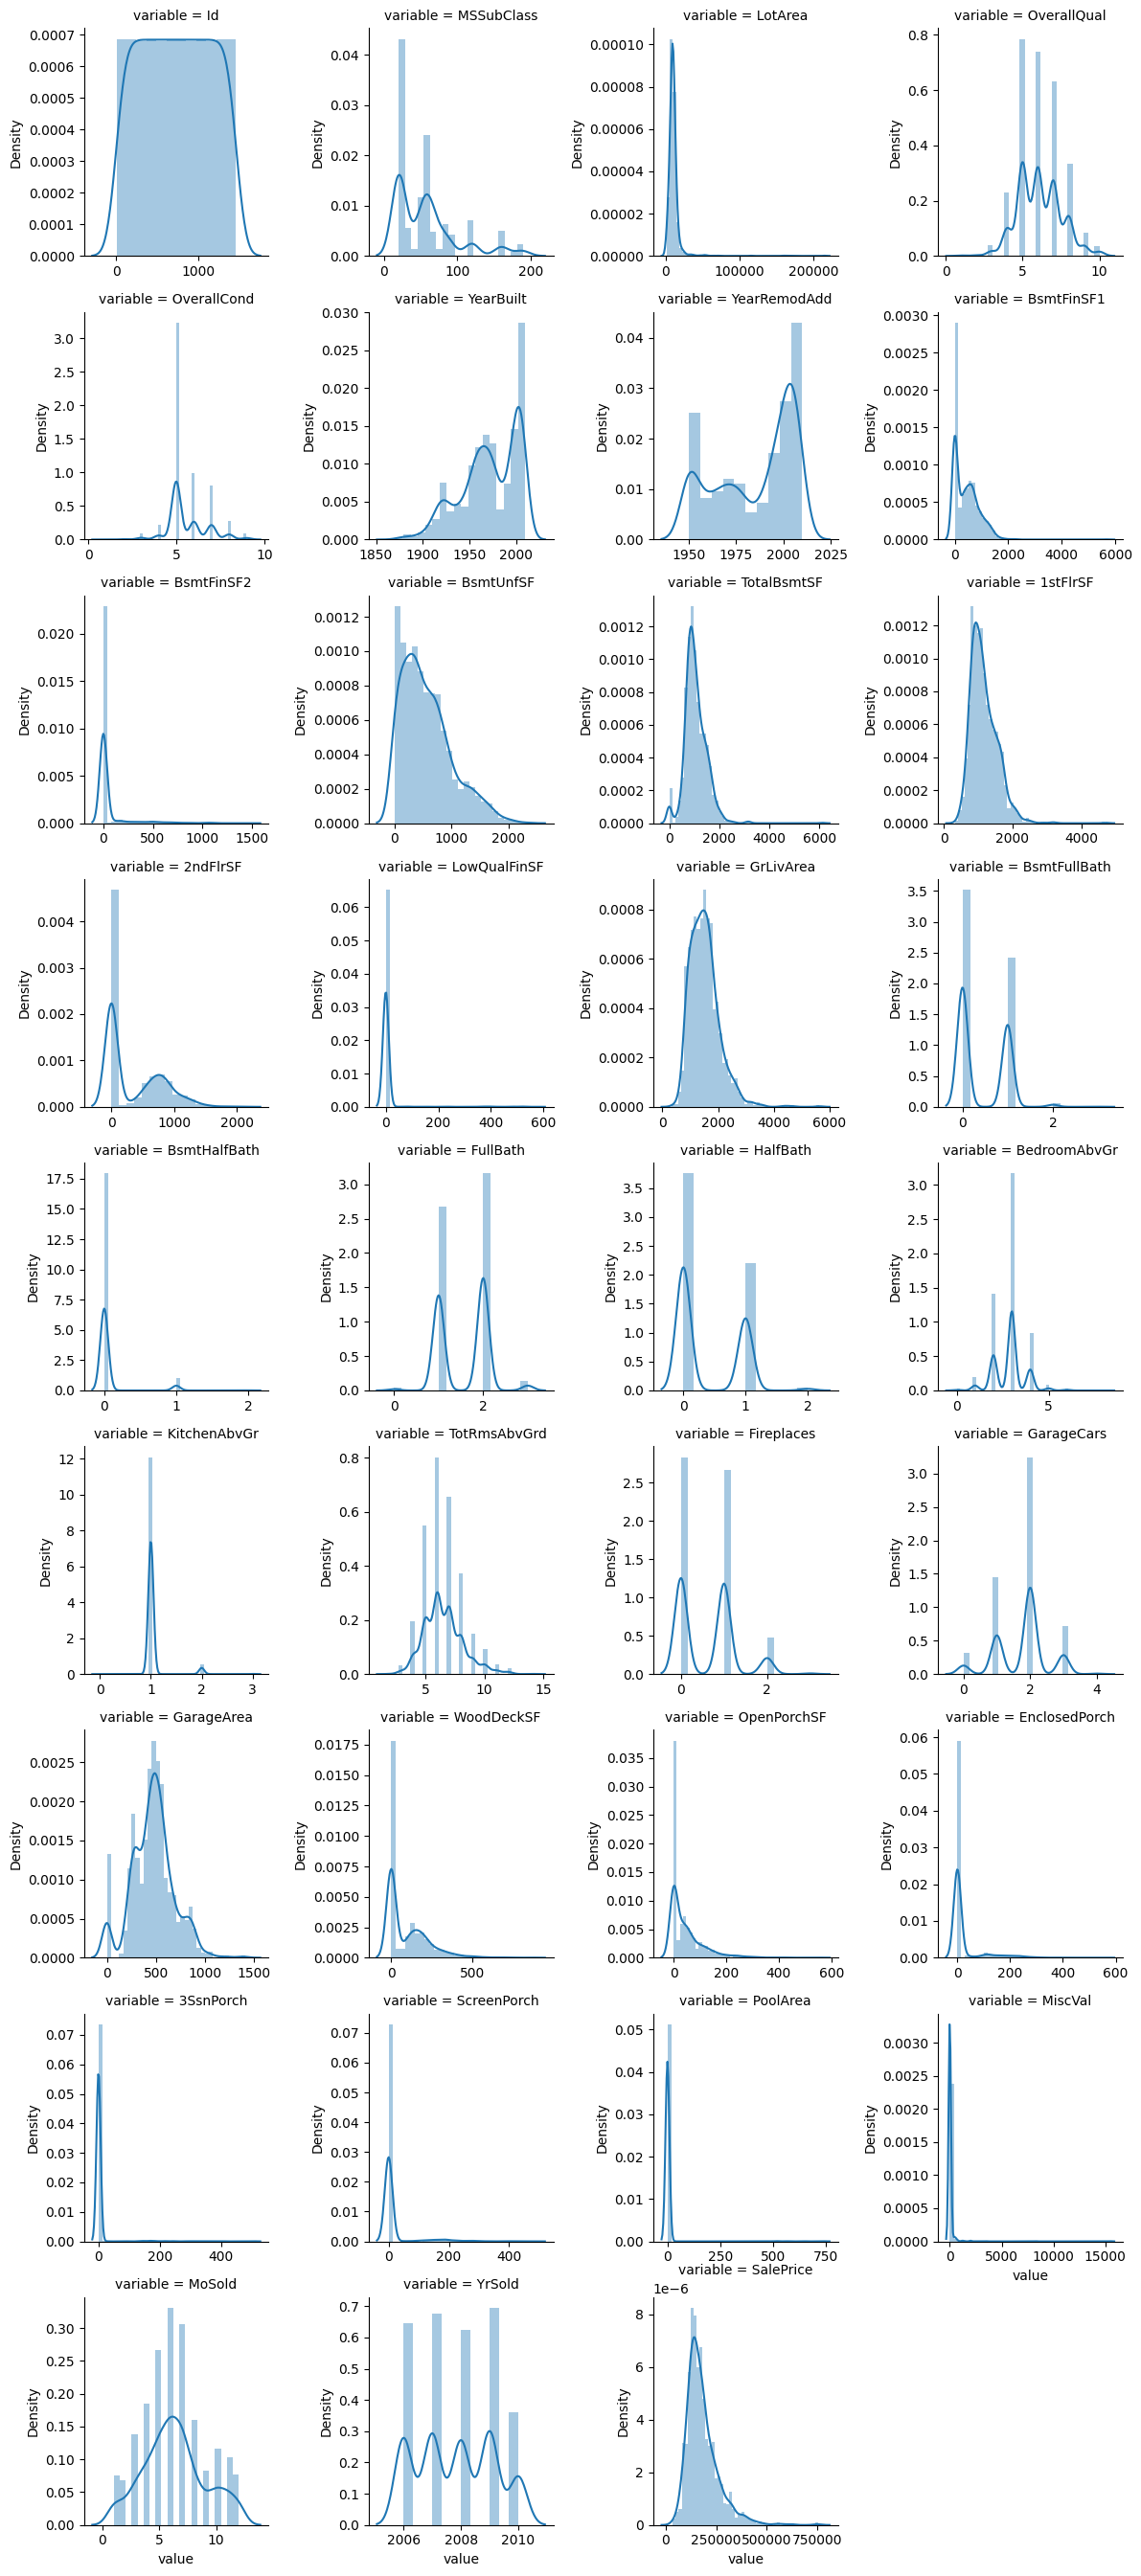

In [67]:
f = pd.melt(house_numeric, value_vars=house_numeric.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [68]:
house_numeric['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

#### **Analisis tentang variabel `PoolArea`**

*   Nilai 0 Sangat Banyak
*   Nilai Bukan 0 cuman ada 7 data
*   Tidak semua rumah memiliki Kolam Renang
*   Bisa dibuat Cluster dengan Kolam renang dan Tanpa Kolam Renang

## Pemrosesan Data Variabel Numerikal

<ipython-input-69-3c7ce2e138c6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176834


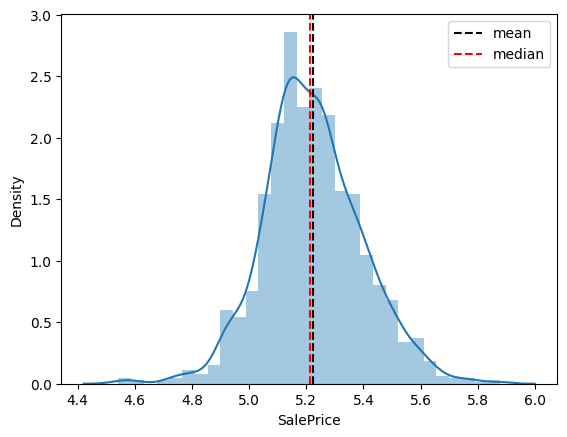

In [69]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

<ipython-input-70-ba8633a155f2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663862


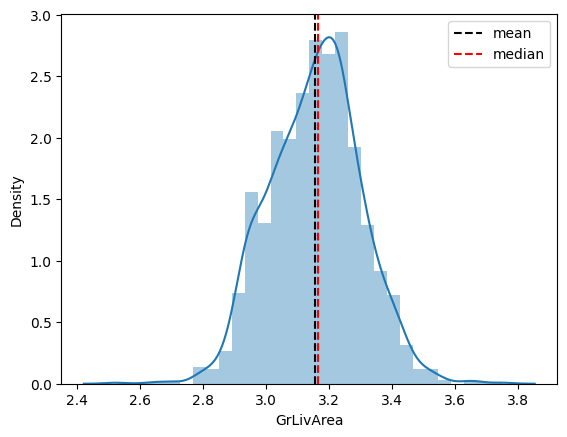

In [70]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

<ipython-input-71-a7b4ae5ef113>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 2.7442929831226763
Mean: 2.7557179129199136
Std Dev: 0.06486028432445097


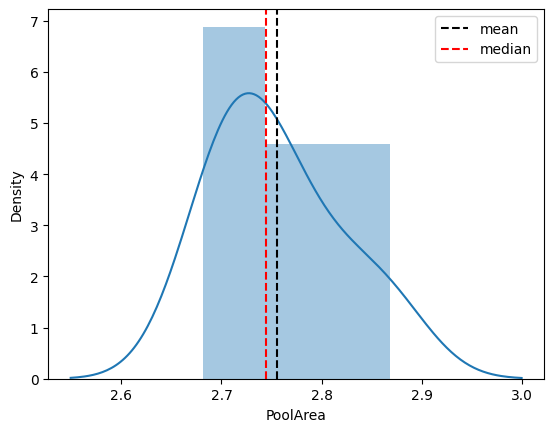

In [71]:
# Menghilangkan nilai nol pada PoolArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = np.log10(house_numeric["PoolArea"][house_numeric["PoolArea"] > 0])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* Dengan transformasi Log menjadikan distribusi mendekati distribusi normal
* Kita bisa mengetahui kondisi data dengan distribusi normal dari data yang Right-Skewed

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

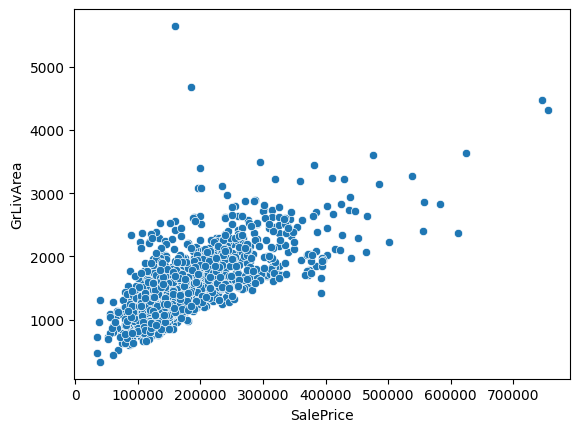

In [72]:
### Tulis kode Anda di sini
ax = sns.scatterplot(y="GrLivArea", x="SalePrice", data=house_numeric)
plt.show()

# `GarageArea` dengan `SalePrice`

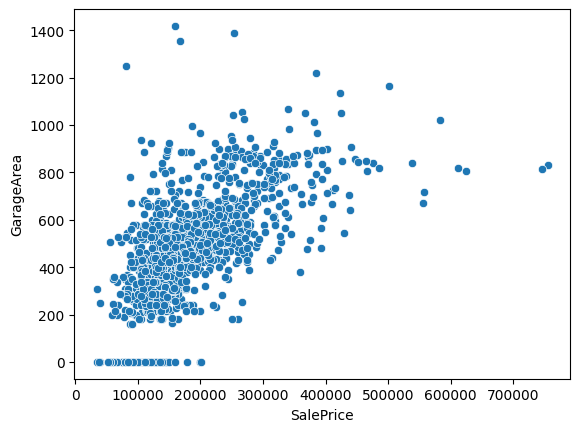

In [73]:
### Tulis kode Anda di sini
ax = sns.scatterplot(y="GarageArea", x="SalePrice", data=house_numeric)
plt.show()

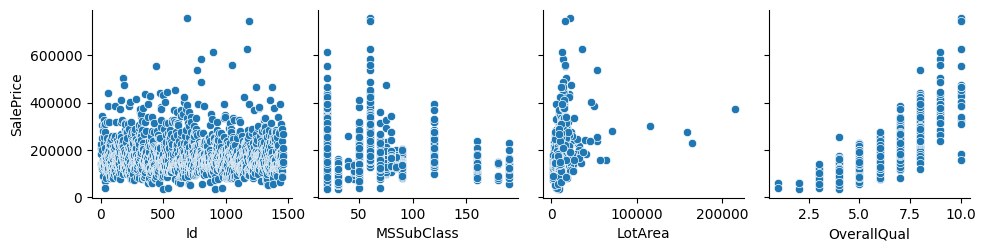

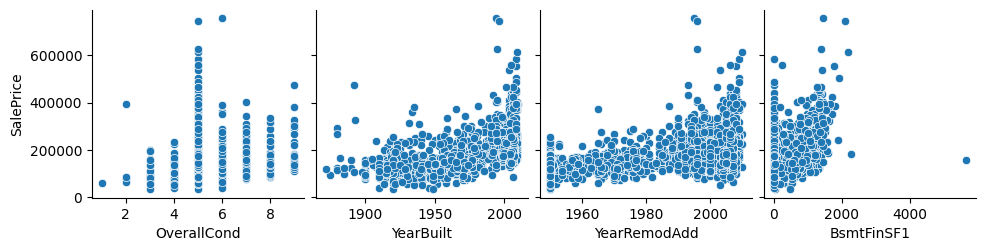

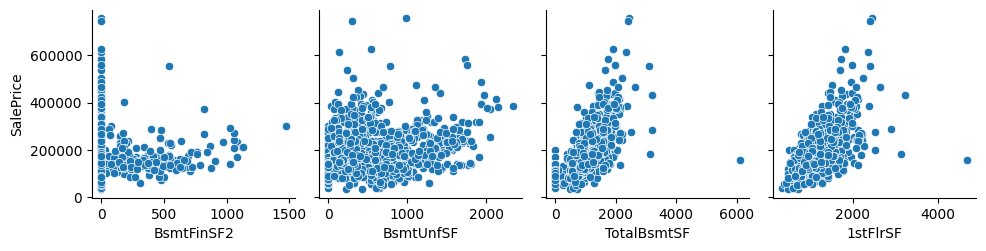

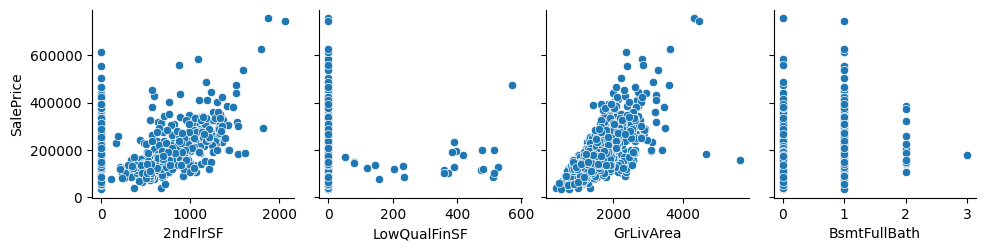

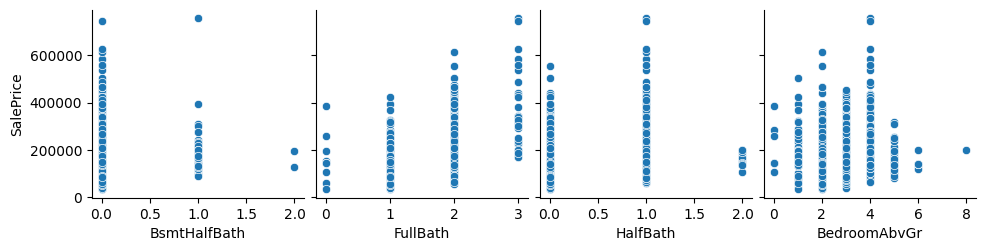

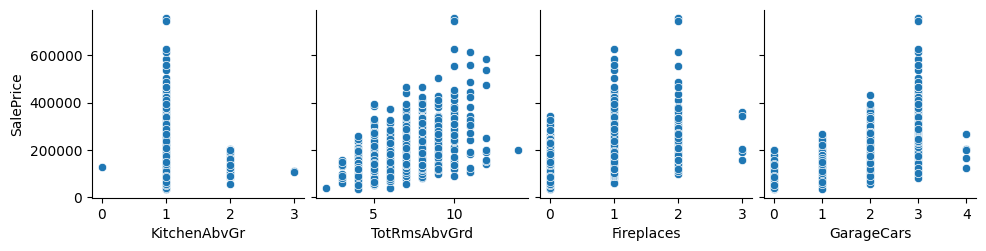

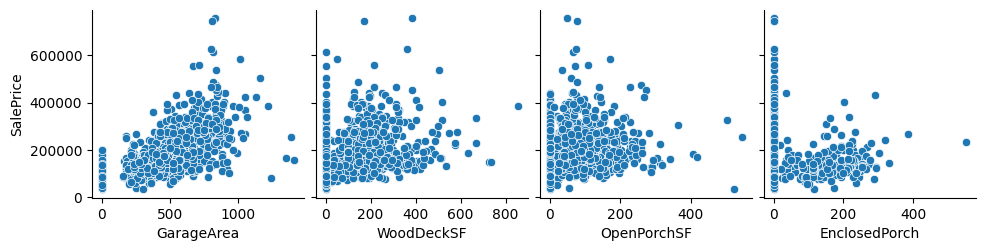

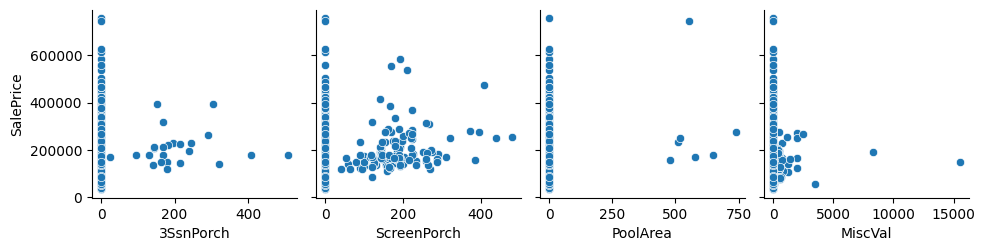

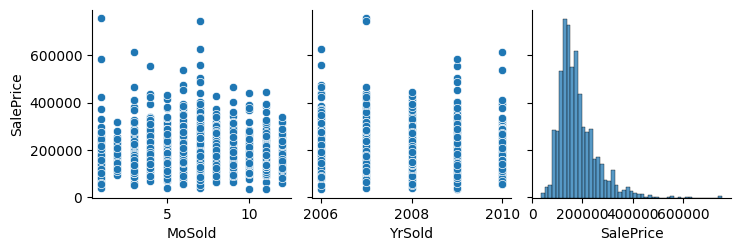

In [74]:
#pairplot
subplots_col = 4
for i in range(0, len(house_numeric.columns), subplots_col):
    sns.pairplot(data=house_numeric,
                x_vars=house_numeric.columns[i:i+subplots_col],
                y_vars=['SalePrice'])

#### **Hipotesis tentang hubungan antar-variabel**

* Berkorelasi Positif
* Data memiliki Outlier terbanyak ada di GarageArea X SalePrice
Bisa disimpulkan bahwa Luasan Rumah dan Garasi mempengaruhi Harga Jual Sebuah Rumah
